<a href="https://colab.research.google.com/github/Harshini-2k5/dl/blob/main/dl2imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
maxlen=200
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5146 - loss: 0.7083 - val_accuracy: 0.4997 - val_loss: 0.8461
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5154 - loss: 0.7084 - val_accuracy: 0.5002 - val_loss: 0.8407
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5039 - loss: 0.7268 - val_accuracy: 0.5003 - val_loss: 0.8248
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5123 - loss: 0.7038 - val_accuracy: 0.5001 - val_loss: 0.8548
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5088 - loss: 0.7273 - val_accuracy: 0.4984 - val_loss: 0.7919
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5063 - loss: 0.6909 - val_accuracy: 0.5008 - val_loss: 0.7897
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5058 - loss: 0.6937 - val_accuracy: 0.4999 - val_loss: 0.7686
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5052 - loss: 0.6887 - val_accuracy: 

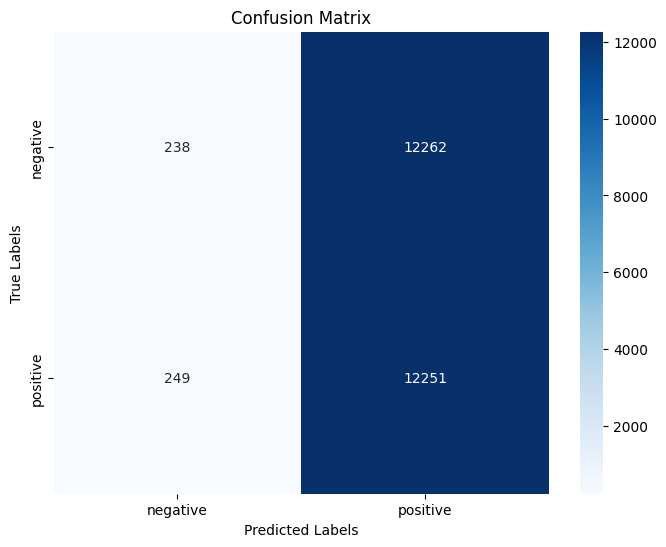

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print("Accuracy:%2f%%"%(score[1]*100))
y_pred = (model.predict(x_test) > 0.5).astype("int32")
import numpy as np
from sklearn.metrics import classification_report as classsifiaction_report
print(classsifiaction_report(y_test,y_pred,target_names=["negative","positive"]))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues',xticklabels=["negative","positive"],yticklabels=["negative","positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
